# Домашнее задание 1. Сбор данных

При решении реальных задач мы почти никогда не имеем дело с "хорошими" исходными данными, уже подготовленными для обработки и анализа. Как правило на входе имеются неструкткрированные данные в "грязном" виде, например необработанные тексты, изображения или аудио файлы. Иногда нет даже этого, и данные приходится собирать из разных доступных источников: разнообразных баз данных, внешних сервисов и даже электронных таблиц. После того, как данные получены, их унифицируют, очищают от шума, преобразовывают в нужный вид и сохраняют для дальнейшего анализа. В одном из традиционных подходов к Data Mining этот процесс называется Extract-Transform-Load

In [1]:
!pip install -r requirements.txt

    100% |████████████████████████████████| 81kB 826kB/s ta 0:00:01
  Running setup.py bdist_wheel for folium ... done
  Stored in directory: /home/anton/.cache/pip/wheels/04/d0/a0/b2b8356443364ae79743fce0b9b6a5b045f7560742129fde22
  Running setup.py bdist_wheel for vk ... done
  Stored in directory: /home/anton/.cache/pip/wheels/8d/e2/0c/056e125d54b4c9b2830ca6a7e6de00b36d416775da969abb94
Successfully built folium vk


In [36]:
import vk
import folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

Нам потребуется загрузить информацию о местах, в которых совершаются чекины, иначе говоря провести сбор данных (data collection). [Ссылка на ВК для разработчиков](https://vk.com/dev)

Для того, чтобы получить доступ к API прежде всего необходимо зарегистрироваться в VK в качестве разработчика и создать свое [приложение](https://vk.com/apps?act=manage). После создания приложения будет доступен набор ключей, которые мы будем использовать для аутентификации. Далее вам потребуется создать токен авторизации, чтобы получать доступ к API. Этот токен необходимо скопировать в соответствующие константы ниже. Подробнее о том, как работает аутентификация в VK API можно почитать [по ссылке](https://vk.com/dev/first_guide), хотя это нужно скорее для ознакомления: библиотека обращения с API позаботится о механизме аутентификации за нас.

In [12]:
session = vk.Session()
vk_api = vk.API(session)
identifikator = vk_api.users.get(user_id=34077739) # пример получения данных без токена авторизации

In [13]:
token = "12439807ca8586f458a7a127f206cdebcbdc514a8386488c137fe17d69c7d9d116250925db3703c80a4d6"
session = vk.Session(access_token=token)
vkapi = vk.API(session=session)

VK API может отдавать вам посещаемые места несколькими способами: в некотором радиусе от точки или же по id самого места. Мы будем пользоваться [вторым способом](https://vk.com/dev/places.getById) . Требуется написать функцию, которая на вход получает объект подключения к API и индекс, до какого объекта требуется запросить. Возвращать она будет pandas.DataFrame с полученными данными.

In [14]:
def get_place_info(vkapi, idx=5000):
    i = 1
    count = idx
    places = []
    while (count > 0): # выгружаем последовательно по 1000 строк
        if(count < 1500):
            places_1 = vkapi.places.getById(places=xrange(i,i + count))
        else:
            places_1 = vkapi.places.getById(places=xrange(i,i + 1500))
        places = places + places_1
        i = i + 1500
        count = count - 1500
    df = pd.DataFrame(places)
    return df

Предположим, что мы хотим понять несколько фактов о выборке объектов с id от 1 до 15000.
Помогите нам это сделать.
А вот и сами факты:
1. Провизуализируйте на карте все объекты которые находятся в Москве? Где больше объектов, в центре или на окраине?
2. Посчитайте количество объектов разного типа. Постройте распределение? Объектов какого типа больше в данной выборке?
3. Посчитайте распределение числа чекинов по всей выборке. Визуализируйте его.
4. Постройте box plot по числу чекинов для каждого типа объектов.
5. Преобразуйте поле created в datetime. Как давно были созданы объекты? Сколько объектов существует больше года? 

Не забудьте сохранить данную выборку, в будущем она вам понадобится.

## Выгружаем данные:

In [15]:
df = get_place_info(vkapi, idx=15000)
df.head()

,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,Мячковский б-р 3а,441,1.0,1,1280741941,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.507325e+09
1,Дачная 2а,16,123.0,1,1280741941,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.507325e+09
2,Лени Голикова 29,7,2.0,1,1280741941,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
3,Героев Танкограда 63,8,158.0,1,1280741941,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
4,Мусы Джалиля 14К1,40,99.0,1,1280741941,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.502604e+09


In [16]:
df.shape # Все выгрузили правильно

(15000, 12)

Судя по размеру, выгрузил правильно.

Сохраним эти данные,чтобы не выгружать постоянно:

In [27]:
df.to_csv('output.csv', sep='\t',encoding='utf-8',index=False)

In [3]:
data = pd.read_csv('output.csv', sep='\t',encoding='utf-8')
data.shape

(15000, 12)

In [9]:
df = data

In [21]:
data.head(10)

,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,Мячковский б-р 3а,441,1.0,1,1280741941,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.507325e+09
1,Дачная 2а,16,123.0,1,1280741941,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.507325e+09
2,Лени Голикова 29,7,2.0,1,1280741941,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
3,Героев Танкограда 63,8,158.0,1,1280741941,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
4,Мусы Джалиля 14К1,40,99.0,1,1280741941,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.502604e+09
5,Мусы Джалиля 14,6,99.0,1,1280741941,https://vk.com/images/places/clubs.png,54.861114,83.091415,6,Опера,4,1.471622e+09
6,Труда 153,15,158.0,1,1280741941,https://vk.com/images/places/clubs.png,55.166948,61.395017,7,Малахит,4,1.470755e+09
7,Сони Кривой 81,3,158.0,1,1280741941,https://vk.com/images/places/clubs.png,55.157006,61.365395,8,Полет,4,1.455943e+09
8,просп. Ленина 66а,198,158.0,1,1280741941,https://vk.com/images/places/clubs.png,55.160365,61.380302,9,Уральские пельмени,4,1.507461e+09
9,Гурьянова 31,14,1.0,1,1280741941,https://vk.com/images/places/clubs.png,55.684858,37.718300,10,Salvador Dali,4,1.498625e+09


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
address      14610 non-null object
checkins     15000 non-null int64
city         14924 non-null float64
country      15000 non-null int64
created      15000 non-null int64
icon         15000 non-null object
latitude     15000 non-null float64
longitude    15000 non-null float64
pid          15000 non-null int64
title        15000 non-null object
type         15000 non-null int64
updated      12721 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.4+ MB


In [5]:
from folium.plugins import MarkerCluster
%matplotlib inline

## 1). Визуализация на карте

In [335]:
mos_center = [55.750475, 37.619020]
mos_min_lat, mos_max_lat = 55.564141, 55.908930
mos_min_lon, mos_max_lon = 37.344362, 37.879945
#data_moscow = data[data.latitude.between(mos_min_lat, mos_max_lat) &
#                   data.longitude.between(mos_min_lon, mos_max_lon)]
Moscow = folium.Map(location = mos_center, zoom_start=11, control_scale=True) # Зададим локацию: Центр Москвы

Первый способ отбора Москвы:

In [336]:
df_Moscow = df[df['latitude'] > mos_min_lat][df['latitude'] < mos_max_lat][df['longitude']>mos_min_lon][df['longitude'] < mos_max_lon]

/home/anton/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [337]:
df_Moscow.shape

(4339, 12)

In [338]:
df_Moscow.head()

,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,Мячковский б-р 3а,441,1.0,1,2010-08-02 13:39:01,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.507325e+09
9,Гурьянова 31,14,1.0,1,2010-08-02 13:39:01,https://vk.com/images/places/clubs.png,55.684858,37.718300,10,Salvador Dali,4,1.498625e+09
14,2-я Брестская 6,5,1.0,1,2010-08-02 13:39:01,https://vk.com/images/places/clubs.png,55.770968,37.591562,15,Моспроект,4,1.444137e+09
19,Лубянский пр. 25К1,0,1.0,1,2010-08-02 13:39:01,https://vk.com/images/places/clubs.png,55.757116,37.631460,20,Дом Кукера,4,1.344699e+09
21,Новослободская 26,2,1.0,1,2010-08-02 13:39:01,https://vk.com/images/places/clubs.png,55.783104,37.598025,22,Хроника-бар,4,1.398173e+09


Выберем те адреса, которые находятся в Москве:

In [356]:
Places_cluster = MarkerCluster(locations=df_Moscow[['latitude', 'longitude']].values)

In [357]:
Places_cluster.add_to(Moscow)

In [360]:
Moscow

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Второй способ:

In [342]:
# Функция локализации точки относительно многоугольника-Москвы (Важно: Оси инвертированы)
def rotate(A,B,C):
    return (B[0]-A[0])*(C[1]-B[1])-(B[1]-A[1])*(C[0]-B[0])

def intersect(A,B,C,D):
    return rotate(A,B,C)*rotate(A,B,D)<=0 and rotate(C,D,A)*rotate(C,D,B)<0

def pointloc(P,A): # O(log N)
    n = len(P)
    if rotate(P[1],P[0],A)>0 or rotate(P[n-1],P[0],A)<0:
        return False
    p, r = 1, n-1
    while r-p>1:
        q = (p+r)//2
        if rotate(P[0],P[q],A)<0: r = q
        else: p = q
    return not intersect(P[0],A,P[r],P[p])

In [276]:
Moscow_polygon = np.array([(55.54, 37.33),
                           (55.91006, 37.337365),
                           (55.911057, 37.844595),
                           (55.544522, 37.870801)]) 


In [343]:
pointloc(Moscow_polygon,mos_center) # локализация центра

True

## 2)

In [74]:
df_unique_types = pd.unique(df['type'])
print df_unique_types # какие типы есть
print len(df_unique_types) # количество типов

[ 4  3  5  2  7  9 10  1  8  6]
10


In [75]:
b = df.groupby('type')['title'].count()
df_density_type = pd.DataFrame(b)
df_density_type # сколько раз встречается название для такого типа

,title
type,
1,1242
2,90
3,10936
4,1626
5,512
6,9
7,90
8,13
9,183


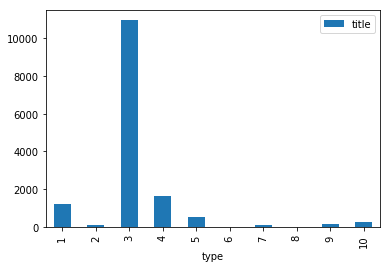

In [90]:
df_density_type.plot(kind='bar')

Посмотрим что это за тип объектов, которых больше всего:

In [89]:
df_type3 = df[df['type'] == 3]
df_type3.head()

,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
1296,просп. Стачек 99,0,2.0,1,1280742023,https://vk.com/images/places/restaraunt.png,59.858697,30.249267,1297,У Швейка. Супы и сосиски,3,NaN
1297,Кольский просп. 27,25,87.0,1,1280742023,https://vk.com/images/places/restaraunt.png,68.944536,33.099226,1298,Сфера,3,1.505578e+09
1298,Татарстан 3К2,0,60.0,1,1280742023,https://vk.com/images/places/restaraunt.png,55.786764,49.122853,1299,Афродита,3,NaN
1299,Академика Павлова 14,0,2.0,1,1280742023,https://vk.com/images/places/restaraunt.png,59.976220,30.309544,1300,Ажур,3,NaN
1300,Шенкурский пр. 14,0,1.0,1,1280742023,https://vk.com/images/places/restaraunt.png,55.897670,37.591566,1301,Остапчик,3,1.336479e+09


Как видно из названий и строке '/places/restaraunt.png' в адресе, третий тип это рестораны

## 3)

In [92]:
a = df.groupby('checkins')['title'].count() # групируем по 'title', т.к. там нет пропусков
df_density = pd.DataFrame(a)
df_density # распределение числа чекинов

,title
checkins,
0,3989
1,1398
2,1123
3,902
4,747
5,536
6,479
7,450
8,335


In [93]:
l = df[df['checkins'] == 10] # прверка вручную правильно ли нашел число объектов у которых 10 чекинов
l.shape # вроде правильно

(282, 12)

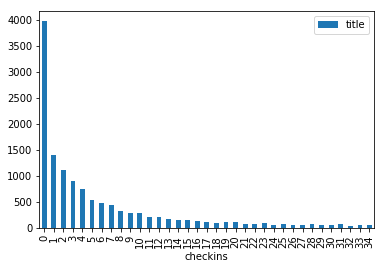

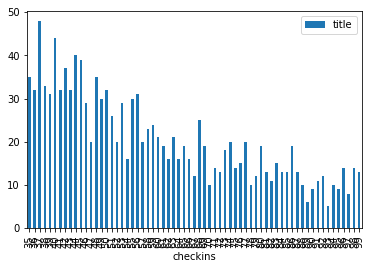

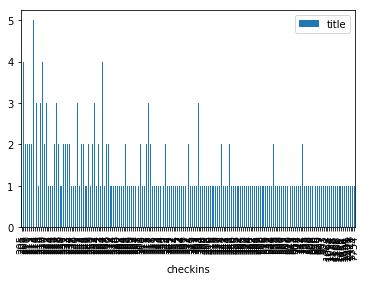

In [308]:
#axes = plt.subplots(1, 2, figsize=(14, 5))
df_density[0:35].plot(kind='bar') # на первых 35
df_density[35:100].plot(kind='bar') # видно постепенное угасание на 35-100
df_density[200:500].plot(kind='bar') # видна стабилизация на 200-500

## 4).

In [200]:
df[df.type == 3].shape

(10936, 12)

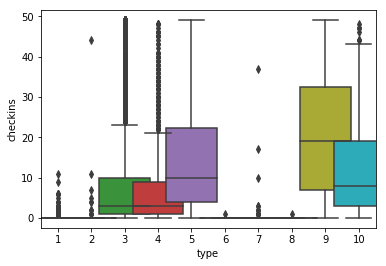

In [334]:
figsize=(14, 14)# постараемся убрать выбросы
sns.boxplot(y=df[df.type ==  df['type']][df['checkins'] < 50].checkins, x = df['type'], width = 1.5)

## 5).

In [161]:
convert = lambda x: datetime.datetime.fromtimestamp(x)
converted_df = df['created'].apply(convert)

In [164]:
df['created'] = converted_df
df.head()

,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,Мячковский б-р 3а,441,1.0,1,2010-08-02 13:39:01,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.507325e+09
1,Дачная 2а,16,123.0,1,2010-08-02 13:39:01,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.507325e+09
2,Лени Голикова 29,7,2.0,1,2010-08-02 13:39:01,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
3,Героев Танкограда 63,8,158.0,1,2010-08-02 13:39:01,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
4,Мусы Джалиля 14К1,40,99.0,1,2010-08-02 13:39:01,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.502604e+09


In [173]:
df.shape

(15000, 12)

In [175]:
sum_=0 
for i in range(15000):
    if((datetime.datetime.now() - df['created'][i]).days > 365):
        sum_ += 1
        
print sum_

15000


Все места были созданы более года назад